<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDdWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('WATCHLIST.xlsx')
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,2020-04-18,Tremors,movie,7.1,96,1990,"Comedy, Horror",147571,1990-01-19,Ron Underwood
1,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",421879,1958-05-09,Alfred Hitchcock
2,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,345563,1968-12-20,Sergio Leone
3,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin
4,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",383632,2007-12-03,Tim Burton
5,2020-05-08,Ghostbusters,movie,7.8,105,1984,"Action, Comedy, Fantasy, Sci-Fi",439388,1984-06-07,Ivan Reitman
6,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5770,1996-08-14,Fraser C. Heston
7,2020-05-11,Lassie,movie,5.8,94,1994,"Family, Adventure",6612,1994-07-22,Daniel Petrie
8,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11570,1996-05-17,Alan Shapiro
9,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3239,1995-01-13,Phillip Borsos


In [3]:
# Displaying the number of rows and columns in the dataset:
df.shape

(892, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         892 non-null    datetime64[ns]
 1   Title           892 non-null    object        
 2   Title Type      892 non-null    object        
 3   IMDb Rating     892 non-null    float64       
 4   Runtime (mins)  892 non-null    int64         
 5   Year            892 non-null    int64         
 6   Genres          892 non-null    object        
 7   Num Votes       892 non-null    int64         
 8   Release Date    892 non-null    datetime64[ns]
 9   Directors       888 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 69.8+ KB


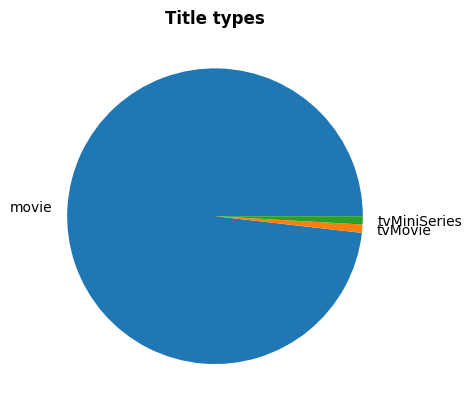

In [5]:
# Displaying the title types present in the dataset:
df.groupby('Created').first()['Title Type'].value_counts().plot(kind = 'pie')
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [7]:
# Creating a datetime object based on the dates from the dataset:
df['Created'] = df['Created'].map(pd.to_datetime)
df['Day Created'] = df['Created'].apply(lambda x : x.day)
df['Month Created'] = df['Created'].apply(lambda x : x.month)
df['Year Created'] = df['Created'].apply(lambda x : x.year)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         892 non-null    datetime64[ns]
 1   Title           892 non-null    object        
 2   Title Type      892 non-null    object        
 3   IMDb Rating     892 non-null    float64       
 4   Runtime (mins)  892 non-null    int64         
 5   Year            892 non-null    int64         
 6   Genres          892 non-null    object        
 7   Num Votes       892 non-null    int64         
 8   Release Date    892 non-null    datetime64[ns]
 9   Directors       888 non-null    object        
 10  Day Created     892 non-null    int64         
 11  Month Created   892 non-null    int64         
 12  Year Created    892 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(4)
memory usage: 90.7+ KB


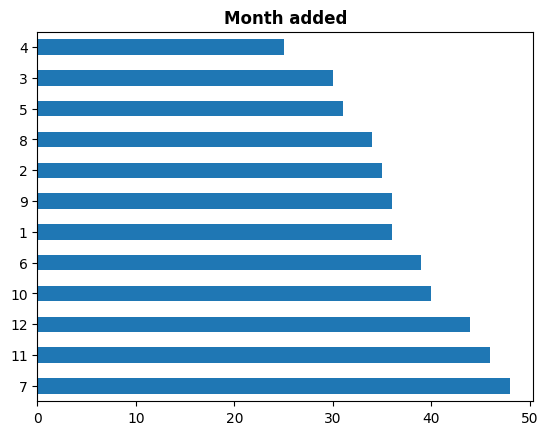

In [8]:
# Displaying distibution of months in which movies were added to the dataset:
df.groupby('Created').first()['Month Created'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('Month added', fontweight = 'bold')
plt.show()

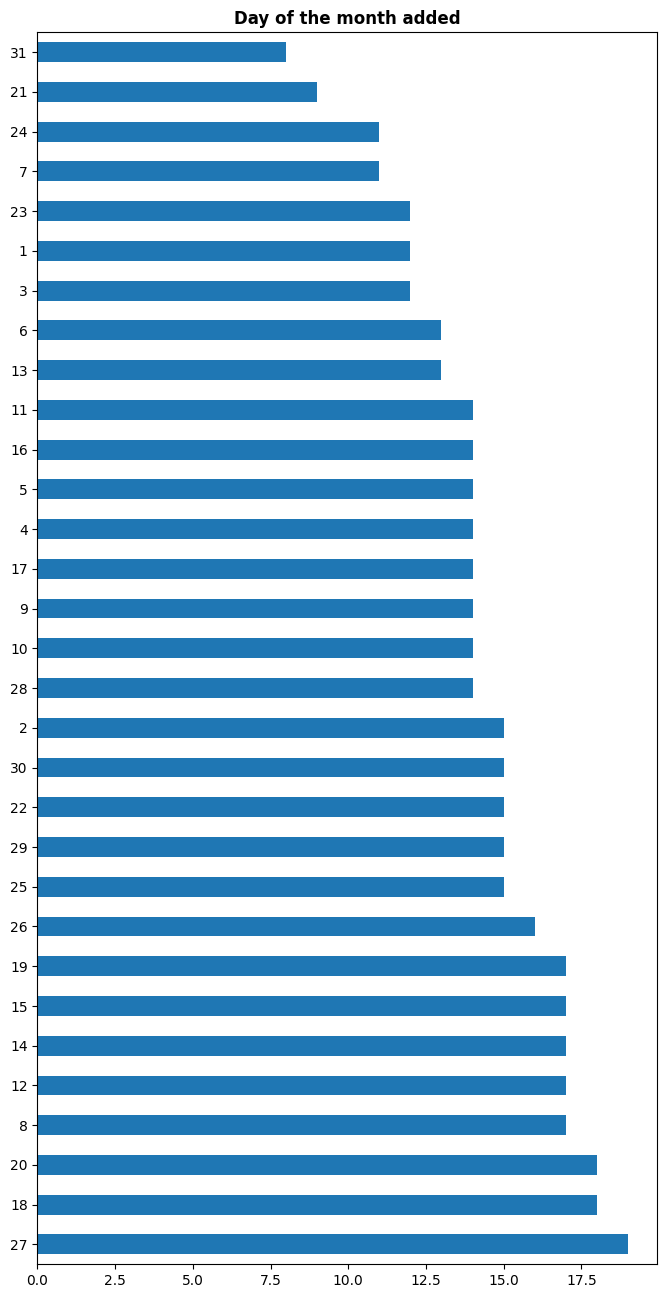

In [10]:
# Displaying distibution of days in which movies were added to the dataset:
df.groupby('Created').first()['Day Created'].value_counts().plot(kind = 'barh', figsize = (8, 16))
plt.ylabel(None)
plt.title('Day of the month added', fontweight = 'bold')
plt.show()

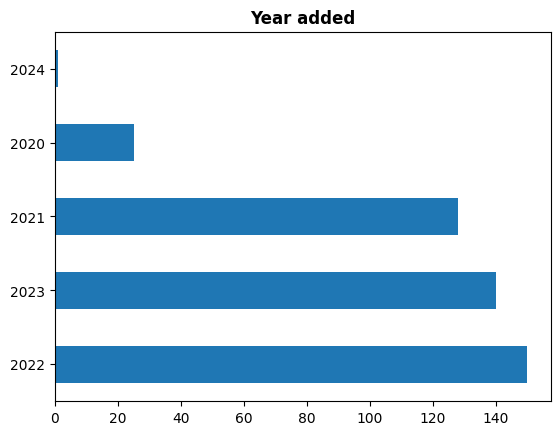

In [11]:
# Displaying distibution of years in which movies were added to the dataset:
df.groupby('Created').first()['Year Created'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('Year added', fontweight = 'bold')
plt.show()

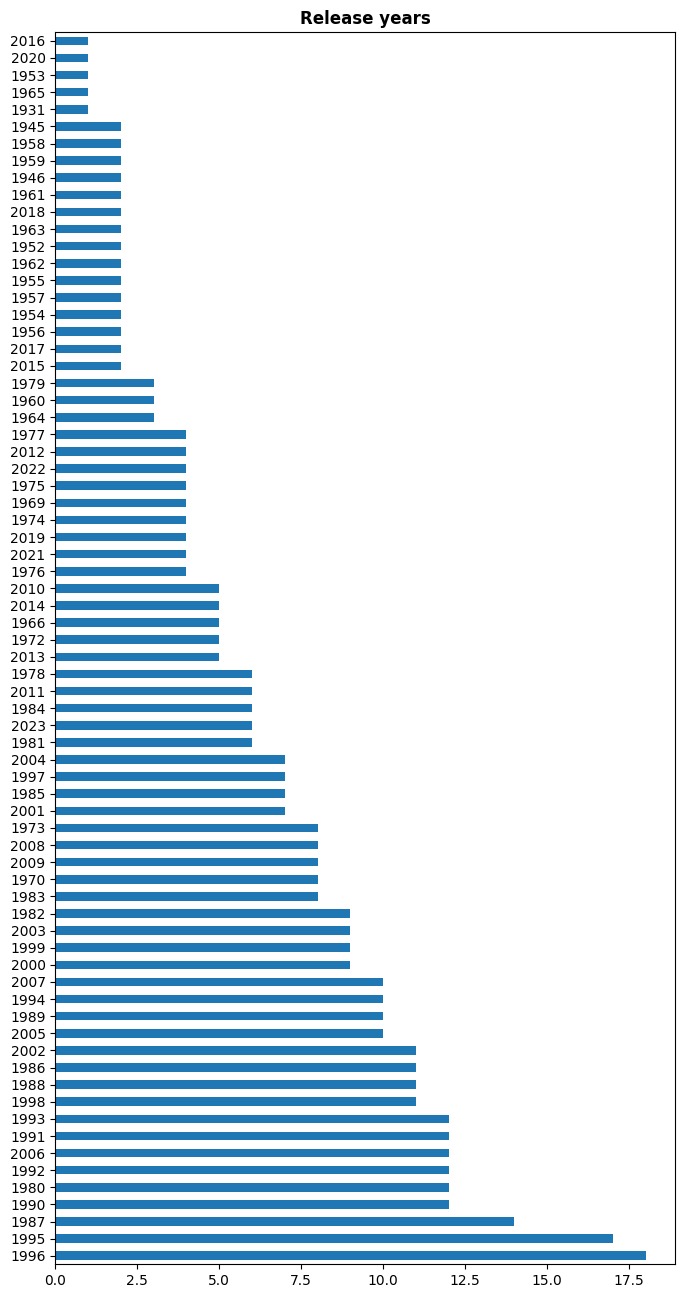

In [12]:
# Displaying distibution of release years in the dataset:
df.groupby('Created').first()['Year'].value_counts().plot(kind = 'barh', figsize = (8, 16))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    result = 'Excellent movie'
  elif rating >= 8 and rating < 9:
    result = 'Amazing movie'
  elif rating >= 7 and rating < 8:
    result = 'Good movie'
  elif rating >= 6 and rating < 7:
    result = 'Okay movie'
  elif rating >= 5 and rating < 6:
    result = 'Average movie'
  else:
    result = 'Poor movie'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['IMDb Rating'].apply(imdb_rating)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Rating classification,Movie popularity,Quality
0,2020-04-18,Tremors,movie,7.1,96,1990,"Comedy, Horror",147571,1990-01-19,Ron Underwood,18,4,2020,Good movie,Almost unknown movie,Good movie
1,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",421879,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing movie,Not so popular movie,Amazing movie
2,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,345563,1968-12-20,Sergio Leone,29,4,2020,Amazing movie,Not so popular movie,Amazing movie
3,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin,29,4,2020,Amazing movie,Almost unknown movie,Amazing movie
4,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",383632,2007-12-03,Tim Burton,7,5,2020,Good movie,Not so popular movie,Good movie
5,2020-05-08,Ghostbusters,movie,7.8,105,1984,"Action, Comedy, Fantasy, Sci-Fi",439388,1984-06-07,Ivan Reitman,8,5,2020,Good movie,Not so popular movie,Good movie
6,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5770,1996-08-14,Fraser C. Heston,11,5,2020,Average movie,Few people know this movie,Average movie
7,2020-05-11,Lassie,movie,5.8,94,1994,"Family, Adventure",6612,1994-07-22,Daniel Petrie,11,5,2020,Average movie,Few people know this movie,Average movie
8,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11570,1996-05-17,Alan Shapiro,11,5,2020,Average movie,Unknown movie,Average movie
9,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3239,1995-01-13,Phillip Borsos,11,5,2020,Okay movie,Few people know this movie,Okay movie


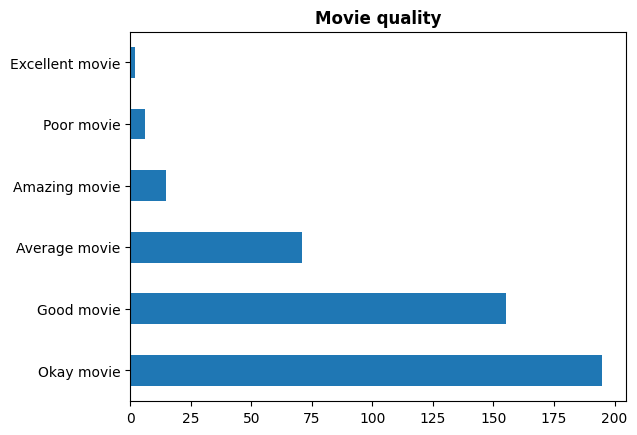

In [21]:
# Displaying the movie rating classification based on the algorithm above:
df.groupby('Created').first()['Rating classification'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    result = 'Incredibly popular movie'
  elif num_votes >= 1000000:
    result = 'Amazingly popular movie'
  elif num_votes >= 750000:
    result = 'Very popular movie'
  elif num_votes >= 500000:
    result = 'Popular movie'
  elif num_votes >= 250000:
    result = 'Not so popular movie'
  elif num_votes >= 100000:
    result = 'Almost unknown movie'
  elif num_votes >= 10000:
    result = 'Unknown movie'
  else:
    result = 'Few people know this movie'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie popularity'] = df['Num Votes'].apply(movie_popularity)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Rating classification,Movie popularity,Quality
0,2020-04-18,Tremors,movie,7.1,96,1990,"Comedy, Horror",147571,1990-01-19,Ron Underwood,18,4,2020,Good movie,Almost unknown movie,Good movie
1,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",421879,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing movie,Not so popular movie,Amazing movie
2,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,345563,1968-12-20,Sergio Leone,29,4,2020,Amazing movie,Not so popular movie,Amazing movie
3,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin,29,4,2020,Amazing movie,Almost unknown movie,Amazing movie
4,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",383632,2007-12-03,Tim Burton,7,5,2020,Good movie,Not so popular movie,Good movie
5,2020-05-08,Ghostbusters,movie,7.8,105,1984,"Action, Comedy, Fantasy, Sci-Fi",439388,1984-06-07,Ivan Reitman,8,5,2020,Good movie,Not so popular movie,Good movie
6,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5770,1996-08-14,Fraser C. Heston,11,5,2020,Average movie,Few people know this movie,Average movie
7,2020-05-11,Lassie,movie,5.8,94,1994,"Family, Adventure",6612,1994-07-22,Daniel Petrie,11,5,2020,Average movie,Few people know this movie,Average movie
8,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11570,1996-05-17,Alan Shapiro,11,5,2020,Average movie,Unknown movie,Average movie
9,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3239,1995-01-13,Phillip Borsos,11,5,2020,Okay movie,Few people know this movie,Okay movie


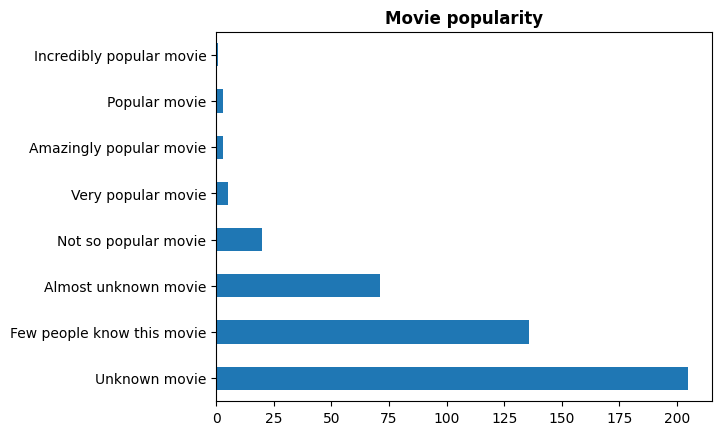

In [23]:
# Displaying the movie popularity based on the algorithm above:
df.groupby('Created').first()['Movie popularity'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    result = 'Really long movie'
  elif runtime >= 150:
    result = 'Very long movie'
  elif runtime >= 120:
    result = 'Long movie'
  elif runtime >= 100:
    result = 'Average length movie'
  elif runtime >= 90:
    result = 'Quick movie'
  elif runtime >= 70:
    result = 'Short movie'
  else:
    result = 'Is that a movie or an episode?'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie duration'] = df['Runtime (mins)'].apply(movie_duration)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Rating classification,Movie popularity,Quality,Movie duration
0,2020-04-18,Tremors,movie,7.1,96,1990,"Comedy, Horror",147571,1990-01-19,Ron Underwood,18,4,2020,Good movie,Almost unknown movie,Good movie,Quick movie
1,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",421879,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing movie,Not so popular movie,Amazing movie,Long movie
2,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,345563,1968-12-20,Sergio Leone,29,4,2020,Amazing movie,Not so popular movie,Amazing movie,Very long movie
3,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin,29,4,2020,Amazing movie,Almost unknown movie,Amazing movie,Long movie
4,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",383632,2007-12-03,Tim Burton,7,5,2020,Good movie,Not so popular movie,Good movie,Average length movie
5,2020-05-08,Ghostbusters,movie,7.8,105,1984,"Action, Comedy, Fantasy, Sci-Fi",439388,1984-06-07,Ivan Reitman,8,5,2020,Good movie,Not so popular movie,Good movie,Average length movie
6,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5770,1996-08-14,Fraser C. Heston,11,5,2020,Average movie,Few people know this movie,Average movie,Average length movie
7,2020-05-11,Lassie,movie,5.8,94,1994,"Family, Adventure",6612,1994-07-22,Daniel Petrie,11,5,2020,Average movie,Few people know this movie,Average movie,Quick movie
8,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11570,1996-05-17,Alan Shapiro,11,5,2020,Average movie,Unknown movie,Average movie,Quick movie
9,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3239,1995-01-13,Phillip Borsos,11,5,2020,Okay movie,Few people know this movie,Okay movie,Short movie


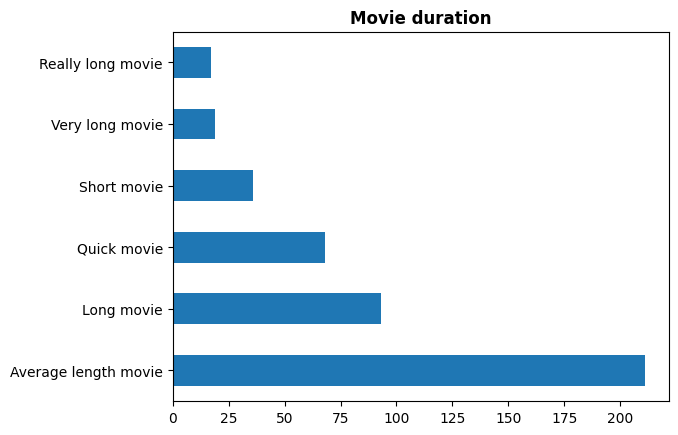

In [26]:
# Displaying the movie duration based on the algorithm above:
df.groupby('Created').first()['Movie duration'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()